In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("./lucas_soil_2018.csv")
df.head()

/var/folders/d5/tjnvwpgj1yddg5dlp5dr9wqr0000gn/T/ipykernel_52621/1167546493.py:1: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./lucas_soil_2018.csv")


,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,Lucas2015,Lucas2018,Coarse,Clay,Sand,Silt,PSDAvailable,TextureFromSurvey,USDA,ISSS
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,YES,YES,2.0,23.0,23.0,54.0,Yes,2009.0,silt loam,silty loam
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,YES,YES,6.0,15.0,47.0,38.0,Yes,2009.0,loam,silty loam
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,YES,YES,4.0,23.0,11.0,66.0,Yes,2009.0,silt loam,silty loam
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [44]:
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0_x',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'NUTS_0_y',
       'Lucas2009', 'Lucas2012', 'Lucas2015', 'Lucas2018', 'Coarse', 'Clay',
       'Sand', 'Silt', 'PSDAvailable', 'TextureFromSurvey', 'USDA', 'ISSS'],
      dtype='object')

In [45]:
df.drop(
    columns=["Lucas2009", "Lucas2015", "Lucas2012", "Lucas2012", "Lucas2018"],
    inplace=True,
)
df.drop(columns=["TextureFromSurvey", "PSDAvailable", "NUTS_0_y"], inplace=True)

df.drop(columns=["SURVEY_DATE"], inplace=True)
df["NUTS_0"] = df["NUTS_0_x"]
df.drop(columns=["NUTS_0_x"], inplace=True)

df.drop(columns=["POINTID"], inplace=True)
df.drop(columns=["TH_LAT", "TH_LONG"], inplace=True)

print(df.columns)

Index(['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K',
       'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_1',
       'NUTS_2', 'NUTS_3', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc',
       'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0'],
      dtype='object')


In [46]:
df.replace("< LOD", np.nan, inplace=True)
df.replace("<  LOD", np.nan, inplace=True)
df.replace("<0.0", np.nan, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             18984 non-null  object 
 1   pH_CaCl2          18983 non-null  float64
 2   pH_H2O            18983 non-null  float64
 3   EC                18975 non-null  float64
 4   OC                18949 non-null  object 
 5   CaCO3             11212 non-null  object 
 6   P                 13981 non-null  object 
 7   N                 18969 non-null  object 
 8   K                 18944 non-null  object 
 9   OC (20-30 cm)     140 non-null    object 
 10  CaCO3 (20-30 cm)  14 non-null     float64
 11  Ox_Al             2510 non-null   float64
 12  Ox_Fe             2510 non-null   float64
 13  NUTS_1            18984 non-null  object 
 14  NUTS_2            18984 non-null  object 
 15  NUTS_3            18984 non-null  object 
 16  Elev              18984 non-null  int64 

In [48]:
df["CaCO3"] = df["CaCO3"].astype(float)
df["P"] = df["P"].astype(float)
df["K"] = df["K"].astype(float)
df["N"] = df["N"].astype(float)

In [49]:
df.describe()

,pH_CaCl2,pH_H2O,EC,CaCO3,P,N,K,CaCO3 (20-30 cm),Ox_Al,Ox_Fe,Elev,Coarse,Clay,Sand,Silt
count,18983.000000,18983.000000,18975.000000,11212.000000,13981.000000,18969.000000,18944.000000,14.000000,2510.000000,2510.000000,18984.000000,16275.000000,16728.000000,16728.000000,16728.000000
mean,5.706427,6.259460,18.389964,96.213566,34.721172,3.154605,204.456638,288.857143,1.171474,2.547171,613.188211,15.694869,19.974773,40.965208,39.055655
std,1.398586,1.319465,25.560630,164.632163,27.546879,3.716608,207.069427,236.021139,1.243111,2.431786,1461.681637,12.815397,13.642703,24.887923,17.497355
min,2.600000,3.340000,0.240000,1.000000,0.300000,0.200000,6.200000,1.000000,0.000000,0.100000,-55.000000,1.000000,0.000000,0.000000,0.000000
25%,4.500000,5.120000,8.095000,1.000000,16.600000,1.300000,85.000000,64.500000,0.600000,1.000000,124.000000,6.000000,9.000000,20.000000,26.000000
50%,5.800000,6.290000,13.950000,5.000000,26.500000,2.000000,153.000000,287.500000,0.900000,1.900000,261.000000,12.000000,18.000000,39.000000,39.000000
75%,7.100000,7.500000,20.600000,123.000000,44.000000,3.400000,261.000000,417.750000,1.300000,3.300000,666.250000,21.000000,28.000000,60.000000,51.000000
max,9.800000,10.430000,1295.600000,926.000000,515.000000,46.500000,7578.800000,702.000000,34.700000,35.800000,11464.000000,98.000000,95.000000,100.000000,93.000000


In [50]:
# Function to detect outliers using IQR
def find_outlier_columns_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=["number"]):  # Select numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]

    return {
        col: count for col, count in outlier_counts.items() if count > 0
    }  # Filter only columns with outliers

In [51]:
outlier_columns = find_outlier_columns_iqr(df)
outlier_columns

{'EC': 1194,
 'CaCO3': 1408,
 'P': 678,
 'N': 1637,
 'K': 989,
 'Ox_Al': 197,
 'Ox_Fe': 136,
 'Elev': 525,
 'Coarse': 666,
 'Clay': 295,
 'Silt': 20}

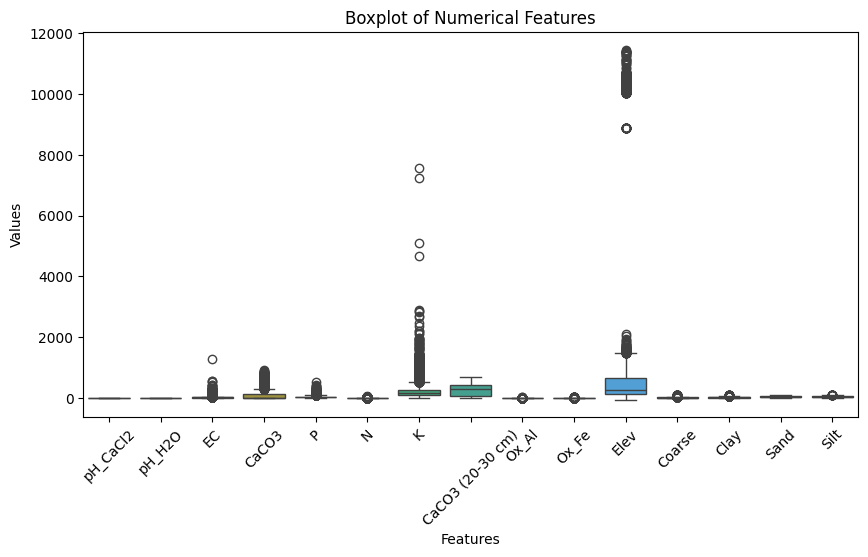

In [52]:
def plot_outliers(data):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data)
    plt.xticks(rotation=45)
    plt.title("Boxplot of Numerical Features")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.show()


plot_outliers(df)


In [53]:
df.drop(columns=["Elev"], inplace=True)

In [54]:
def grab_col_names(data, cat_th=10, car_th=20):
    # Categorical columns and categorical but high-cardinality columns
    cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
    num_but_cat = [
        col
        for col in data.columns
        if data[col].nunique() < cat_th and data[col].dtypes != "O"
    ]
    high_card_cat_cols = [
        col
        for col in data.columns
        if data[col].nunique() > car_th and data[col].dtypes == "O"
    ]

    # Combine Object type columns and Low-unique-value numeric columns into cat_cols
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in high_card_cat_cols]

    # Numerical columns excluding those considered as categorical
    num_cols = [col for col in data.columns if data[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Display information about the dataset
    print(f"Observations: {data.shape[0]}")
    print(f"Variables: {data.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"High Cardinality Categorical Columns: {len(high_card_cat_cols)}")
    print(f"Number but Categorical Columns: {len(num_but_cat)}")
    print("\n")

    return cat_cols, num_cols, high_card_cat_cols


cat_cols, num_cols, high_card_cat_cols = grab_col_names(df)
print(f"Catergorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"High Cardinality Categorical Columns: {high_card_cat_cols}")

Observations: 18984
Variables: 28
Categorical Columns: 4
Numerical Columns: 14
High Cardinality Categorical Columns: 10
Number but Categorical Columns: 0


Catergorical Columns: ['Depth', 'LC0_Desc', 'USDA', 'ISSS']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'Coarse', 'Clay', 'Sand', 'Silt']
High Cardinality Categorical Columns: ['OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc', 'NUTS_0']


In [55]:
print(f"Total number of missing values: {df.isnull().sum().sum()}")

Total number of missing values: 97627


In [56]:
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 0


In [57]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'Coarse', 'Clay', 'Sand', 'Silt']


In [58]:
def my_headmap(data, size):
    if size:
        plt.figure(figsize=size)
    sns.heatmap(
        data.corr(), annot=True, fmt=".1f", cmap="Blues", annot_kws={"size": 12}
    )
    plt.title("Correlation Matrix")
    plt.show()

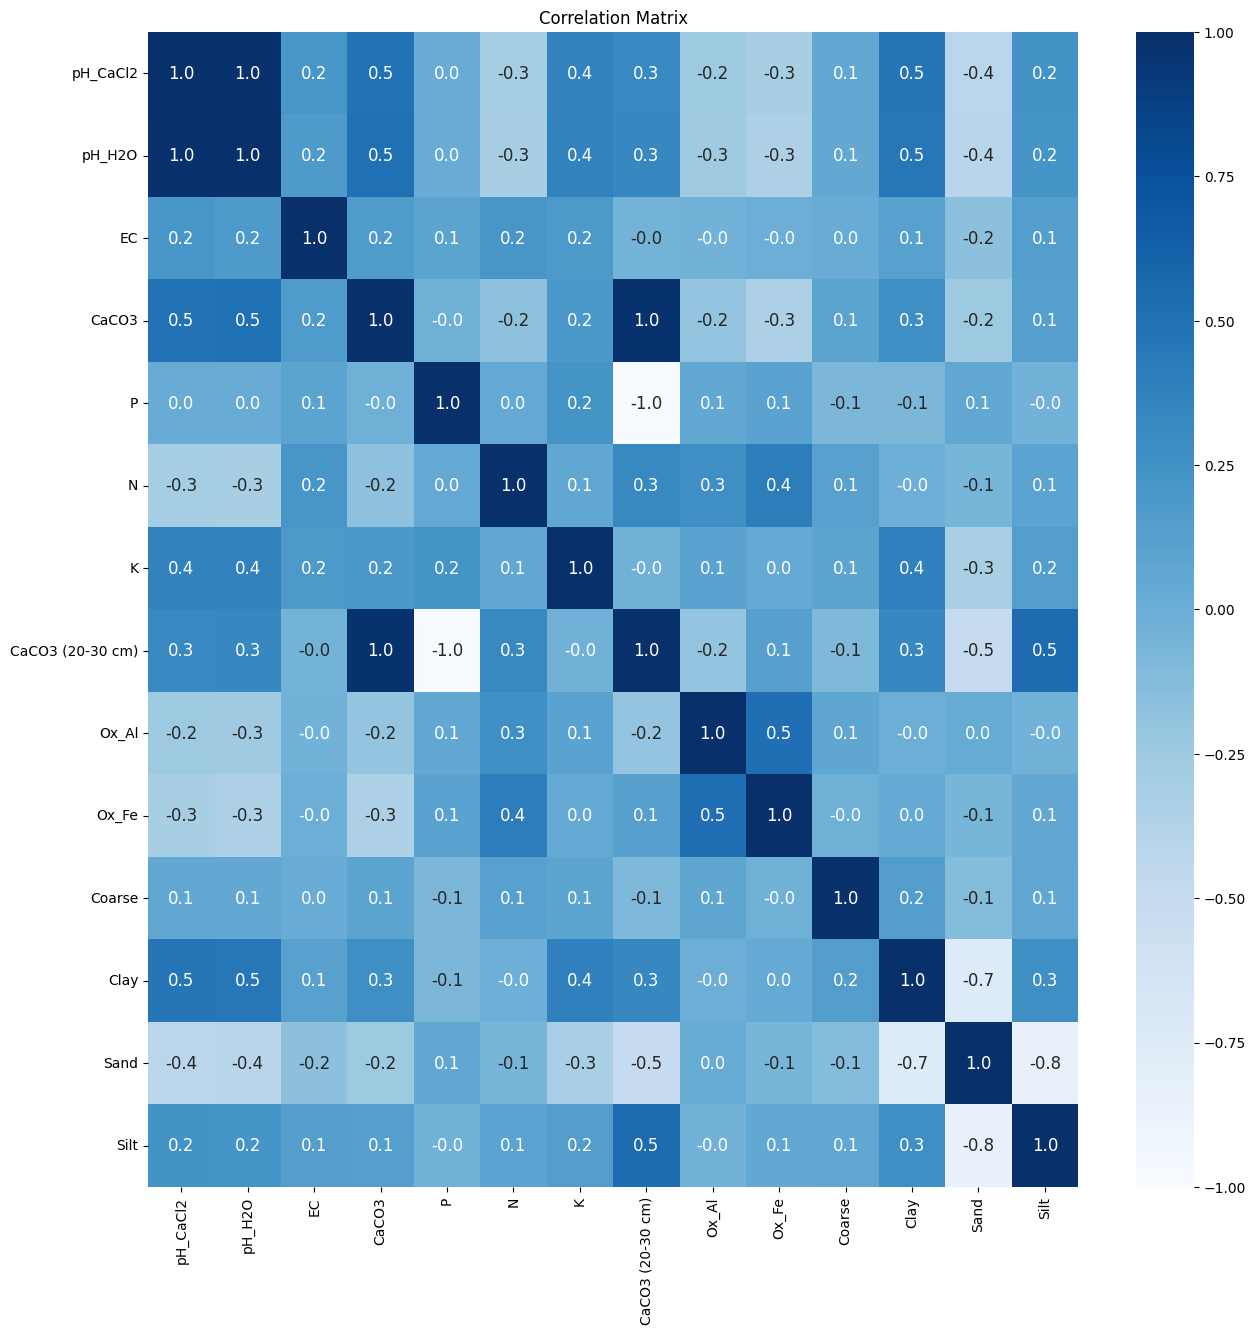

In [59]:
n_numeric_cols = len(numerical_cols)
my_headmap(
    df.select_dtypes(include=[np.number]),
    size=(n_numeric_cols + 1, n_numeric_cols + 1),
)

In [60]:
print(df.isnull().sum())  # Count missing values per column

Depth                   0
pH_CaCl2                1
pH_H2O                  1
EC                      9
OC                     35
CaCO3                7772
P                    5003
N                      15
K                      40
OC (20-30 cm)       18844
CaCO3 (20-30 cm)    18970
Ox_Al               16474
Ox_Fe               16474
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
LC                      0
LU                      0
LC0_Desc                0
LC1_Desc                0
LU1_Desc                0
Coarse               2709
Clay                 2256
Sand                 2256
Silt                 2256
USDA                 2256
ISSS                 2256
NUTS_0                  0
dtype: int64


In [61]:
# Missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
CaCO3 (20-30 cm)    99.926254
OC (20-30 cm)       99.262537
Ox_Fe               86.778340
Ox_Al               86.778340
CaCO3               40.939739
P                   26.353772
Coarse              14.269912
USDA                11.883692
Silt                11.883692
Sand                11.883692
Clay                11.883692
ISSS                11.883692
K                    0.210704
OC                   0.184366
N                    0.079014
EC                   0.047408
pH_H2O               0.005268
pH_CaCl2             0.005268
dtype: float64


In [62]:
def drop_missing_columns(df, threshold=0.8):
    missing_percentages = df.isnull().sum() / len(df)
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    print(columns_to_drop)
    return df.drop(columns=columns_to_drop)


df = drop_missing_columns(df, 0.8)

Index(['OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe'], dtype='object')


In [63]:
from sklearn.impute import KNNImputer

print(f"Remaining columns: {df.columns.tolist()}")


# Fillup missing values
def fill_missing_values(data):
    # Fill missing values for numerical columns with KNN
    imputer = KNNImputer(n_neighbors=5)
    data_imputed = imputer.fit_transform(data.select_dtypes(include=["float64"]))
    data[data.select_dtypes(include=["float64"]).columns] = data_imputed

    # Fill missing values for categorical columns with the mode
    categorical_cols = data.select_dtypes(include=["object"]).columns
    categorical_fill = {col: data[col].mode()[0] for col in categorical_cols}
    data.fillna(categorical_fill, inplace=True)

    return data


df = fill_missing_values(df)
print(df.isnull().sum())  # Count missing values per column


Remaining columns: ['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0']
Depth       0
pH_CaCl2    0
pH_H2O      0
EC          0
OC          0
CaCO3       0
P           0
N           0
K           0
NUTS_1      0
NUTS_2      0
NUTS_3      0
LC          0
LU          0
LC0_Desc    0
LC1_Desc    0
LU1_Desc    0
Coarse      0
Clay        0
Sand        0
Silt        0
USDA        0
ISSS        0
NUTS_0      0
dtype: int64


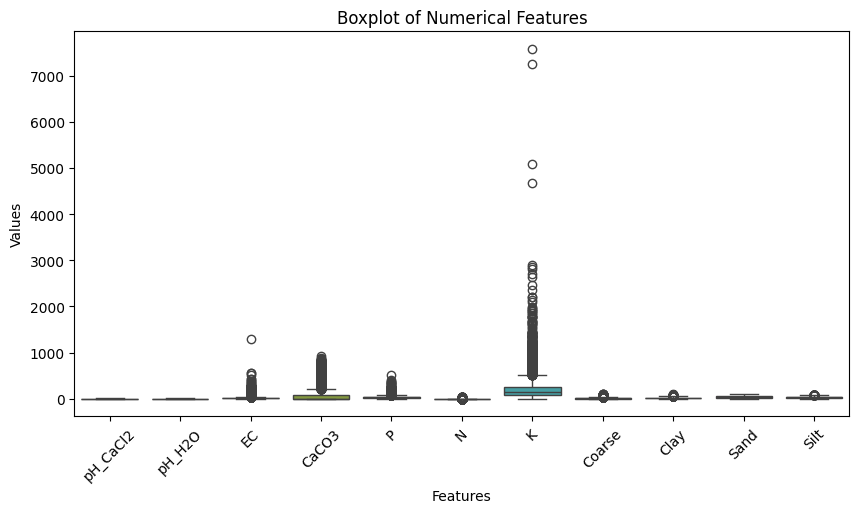

In [64]:
plot_outliers(df)

In [65]:
from sklearn.preprocessing import power_transform


def transform_data(data):
    # Apply power transformation to numerical columns
    num_cols = data.select_dtypes(include=["float64"]).columns
    data[num_cols] = power_transform(data[num_cols], method="yeo-johnson")

    # # Apply one-hot encoding to categorical columns
    # cat_cols = data.select_dtypes(include=["object"]).columns
    # data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

    return data

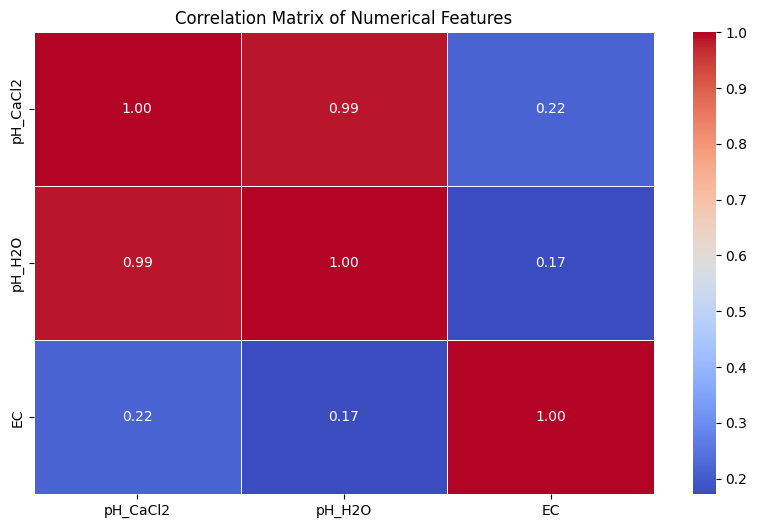

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[["pH_CaCl2", "pH_H2O", "EC"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [67]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'Coarse', 'Clay', 'Sand', 'Silt']


In [68]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder


def label_encode(data):
    le = LabelEncoder()
    for col in data.select_dtypes(include=["object"]).columns:
        print(f"Encoding {col}...")
        data[col] = le.fit_transform(data[col])
    return data


df = label_encode(df)
print(df.head())

Encoding Depth...
Encoding OC...
Encoding NUTS_1...
Encoding NUTS_2...
Encoding NUTS_3...
Encoding LC...
Encoding LU...
Encoding LC0_Desc...
Encoding LC1_Desc...
Encoding LU1_Desc...
Encoding USDA...
Encoding ISSS...
Encoding NUTS_0...
   Depth  pH_CaCl2  pH_H2O     EC    OC  CaCO3      P    N      K  NUTS_1  \
0      1       4.1    4.81   8.73   186    3.0  20.10  1.1  101.9       0   
1      1       4.1    4.93   5.06   455    1.0  46.66  1.3   51.2       0   
2      1       4.1    4.85  12.53  1533    1.0  12.30  3.1  114.8       0   
3      1       5.5    5.80  21.10   932    3.0  25.74  2.0  165.8       0   
4      1       6.1    6.48  10.89   605    2.0  30.84  2.2   42.1       0   

   ...  LC0_Desc  LC1_Desc  LU1_Desc  Coarse  Clay  Sand  Silt  USDA  ISSS  \
0  ...         7        32        12     2.0  23.0  23.0  54.0     9     9   
1  ...         7        55        12     6.0  15.0  47.0  38.0     2     9   
2  ...         7        36        12     4.0  23.0  11.0  66.0     

In [69]:
# Scale numerical features
from sklearn.preprocessing import MinMaxScaler, StandardScaler


def minmax_scale(data):
    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return scaled_data


def scale_data(data):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return scaled_data


# Scale numerical features
df = scale_data(df)
print(df.head())

      Depth  pH_CaCl2    pH_H2O        EC        OC     CaCO3         P  \
0  0.103444 -1.148585 -1.098500 -0.377928 -1.207302 -0.530417 -0.614215   
1  0.103444 -1.148585 -1.007551 -0.521544 -0.803656 -0.545034  0.465553   
2  0.103444 -1.148585 -1.068183 -0.229226  0.813927 -0.545034 -0.931316   
3  0.103444 -0.147548 -0.348175  0.106138 -0.087898 -0.530417 -0.384927   
4  0.103444  0.281468  0.167200 -0.293403 -0.578575 -0.537726 -0.177592   

          N         K    NUTS_1  ...  LC0_Desc  LC1_Desc  LU1_Desc    Coarse  \
0 -0.552721 -0.493999 -1.958413  ...   1.40283  0.256961  0.784458 -1.135566   
1 -0.498891 -0.738959 -1.958413  ...   1.40283  1.380947  0.784458 -0.805665   
2 -0.014414 -0.431672 -1.958413  ...   1.40283  0.452437  0.784458 -0.970615   
3 -0.310483 -0.185263 -1.958413  ...   1.40283  0.745651  0.784458  0.843837   
4 -0.256653 -0.782926 -1.958413  ...   1.40283  0.745651  0.784458 -0.046894   

       Clay      Sand      Silt      USDA      ISSS   NUTS_0  
0  0.

In [70]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop(columns=["pH_H2O", "pH_CaCl2"])
y = df["pH_H2O"]
print("Features shape:", X.shape)
print("Target shape:", y.shape)
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train = transform_data(X_train)
X_test = transform_data(X_test)

Features shape: (18984, 22)
Target shape: (18984,)
X_train shape: (15187, 22)
X_test shape: (3797, 22)
y_train shape: (15187,)
y_test shape: (3797,)


In [71]:
from keras.api.models import Sequential
from keras.api.layers import Dense, Input, Dropout, BatchNormalization
from keras.api.optimizers import Adam, RMSprop
from keras.api.callbacks import EarlyStopping

num_features = X_train.shape[1]
print(f"Number of features: {num_features}")

# callbacks
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Define MLP model
model = Sequential(
    [
        Dense(
            256,
            activation="relu",
            input_shape=(X_train.shape[1],),
            kernel_regularizer="l2",
        ),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation="relu", kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation="relu", kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation="linear"),  # Output for regression
    ]
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
# model.compile(optimizer=RMSprop(learning_rate=0.001), loss="mse", metrics=["mae"])
print(model.summary())

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
)


Number of features: 22


/Users/rafi/.local/share/mise/installs/python/3.12.9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,609 (174.25 KB)

 Trainable params: 43,777 (171.00 KB)

 Non-trainable params: 832 (3.25 KB)

None
Epoch 1/500
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 4.3081 - mae: 1.0544 - val_loss: 2.2316 - val_mae: 0.5472
Epoch 2/500
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.3984 - mae: 0.7015 - val_loss: 1.4797 - val_mae: 0.5359
Epoch 3/500
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.5310 - mae: 0.6112 - val_loss: 0.9991 - val_mae: 0.5127
Epoch 4/500
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.0530 - mae: 0.5736 - val_loss: 0.7343 - val_mae: 0.4891
Epoch 5/500
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.8144 - mae: 0.5553 - val_loss: 0.6211 - val_mae: 0.4945
Epoch 6/500
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6922 - mae: 0.5491 - val_loss: 0.5482 - val_mae: 0.4784
Epoch 7/500
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6083 - mae: 0.5326 - val_loss: 0.5125 - val_mae: 0.4862
Epoch 8/500
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5858 - mae: 0.5394 - val_loss: 0.4880 - val_mae: 0.4901
Epoch 9/500
190/190 ━━━━━━━━━━━━━━━

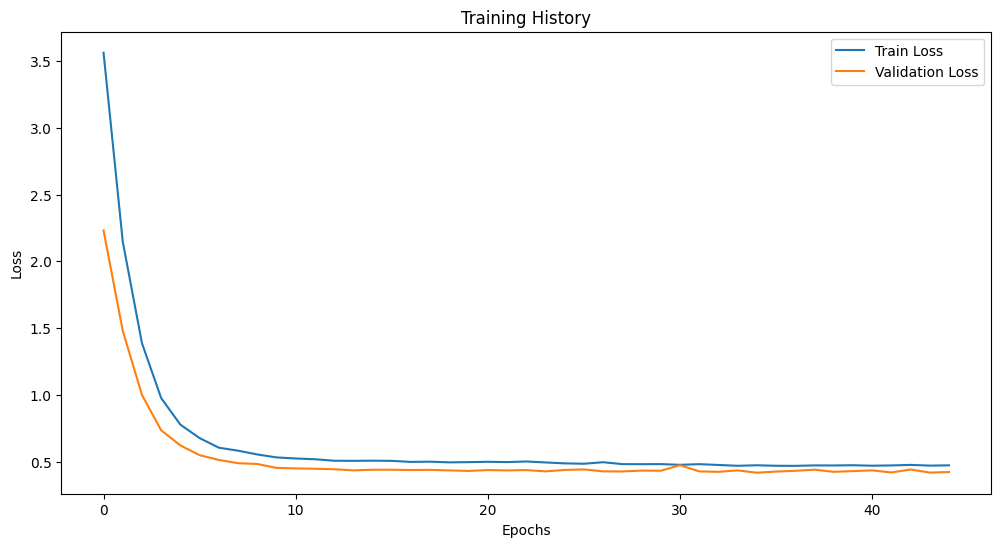

In [76]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4304 - mae: 0.4955
Test Loss: 0.4330, Test MAE: 0.4983
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test RMSE: 0.6146


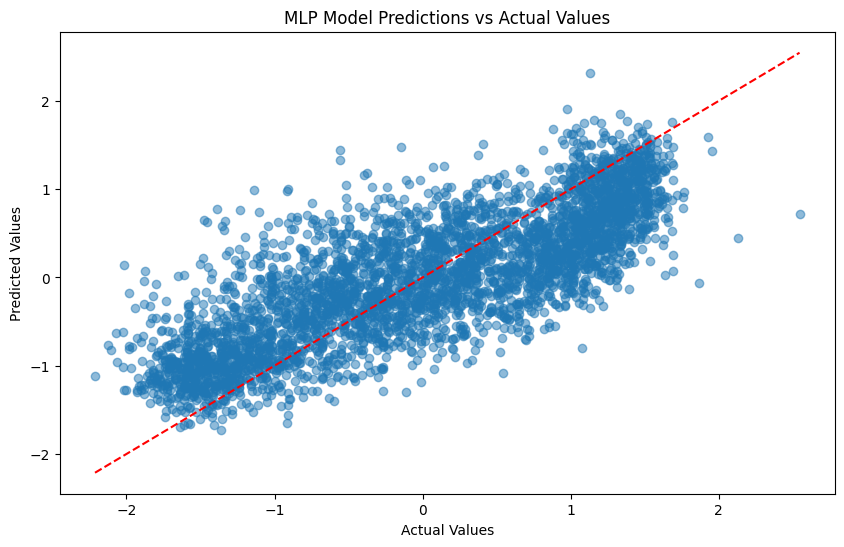

In [77]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")
# Make predictions
y_pred = model.predict(X_test)
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MLP Model Predictions vs Actual Values")
plt.show()


Model Performance Metrics:
R² Score: 0.6305
Root Mean Square Error: 0.6146
Mean Absolute Error: 0.4983
Explained Variance Score: 0.6305


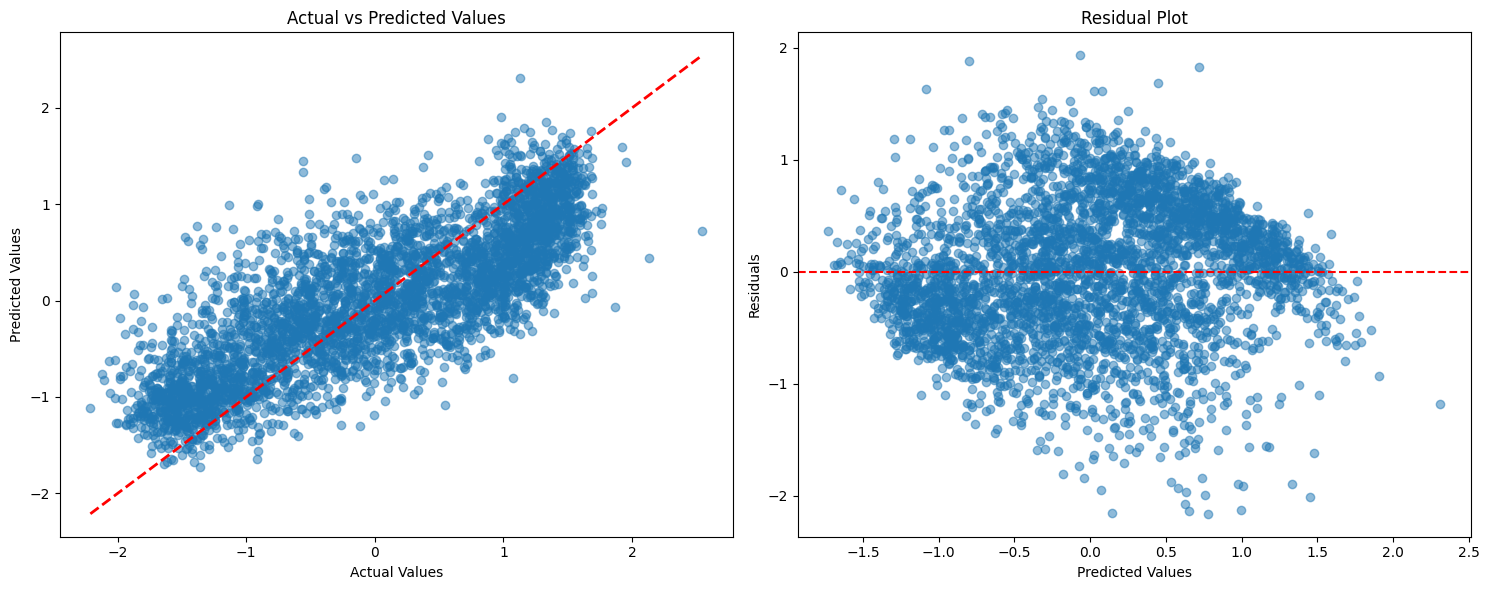

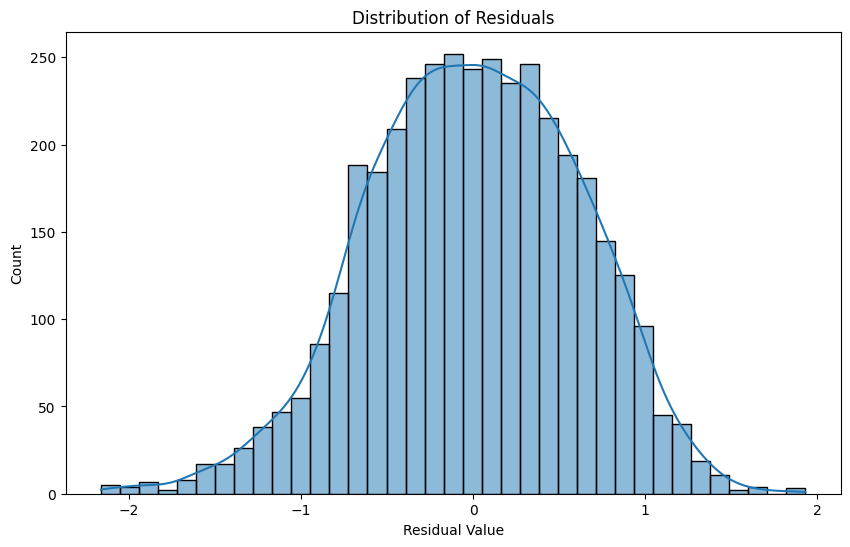

In [78]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    explained_variance_score,
)
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Square Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Explained Variance Score: {evs:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of actual vs predicted values
ax1.scatter(y_test, y_pred, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Actual vs Predicted Values")

# Residual plot
residuals = y_test - y_pred.flatten()
ax2.scatter(y_pred.flatten(), residuals, alpha=0.5)
ax2.axhline(y=0, color="r", linestyle="--")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals")
ax2.set_title("Residual Plot")

plt.tight_layout()
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

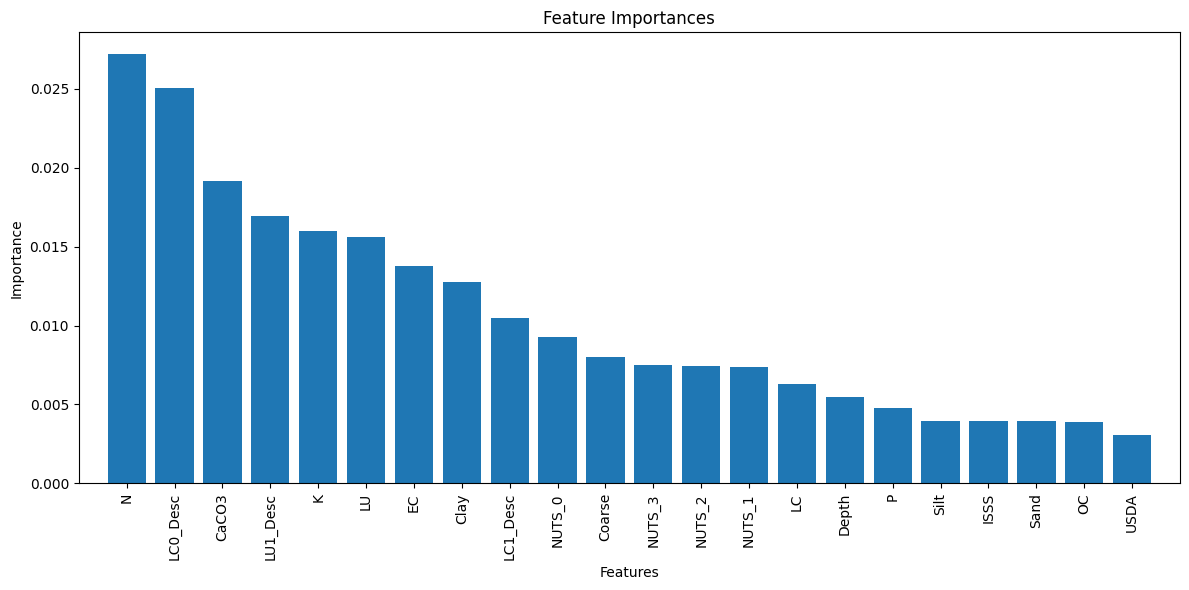

In [75]:
# Feature importance
importances = model.layers[0].get_weights()[0]
importances = np.mean(np.abs(importances), axis=1)
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()